## 모델 불러오기

In [1]:
## 라이브러리 설치
##pip install trimesh

In [2]:
import trimesh

In [3]:
model = trimesh.load('./obj/model.stl')

In [4]:
model.show()

In [5]:
## 모델 내 중복된 꼭지점 합치기
## trimesh에서는 필요없음
# model.merge_vertices()

In [6]:
## 변수에 저장
vertices = model.vertices

## 샘플 추출

https://trimesh.org/trimesh.sample.html

## 시각화

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [8]:
# plt.scatter(vertices[:,0], vertices[:,1])

In [9]:
# plt.scatter(vertices[:,0], vertices[:,2])

In [10]:
# plt.scatter(vertices[:,1], vertices[:,2])

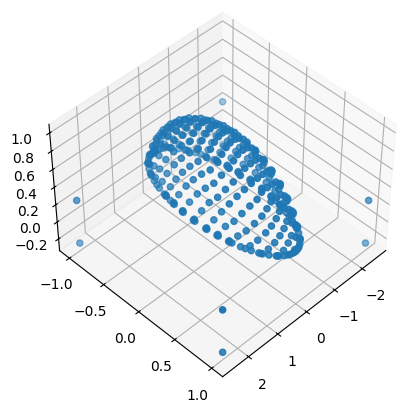

In [11]:
## 꼭지점 scatter
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=45, azim=45)
ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2])

In [12]:
##sample_surface_even()은 샘플들이 서로 가까이 붙지않도록 배치
samples = trimesh.sample.sample_surface_even(model, 200)
points = samples[0]
points

TrackedArray([[-9.65035945e-01,  1.00000000e+00,  5.13893464e-03],
              [-6.74744493e-01, -5.44521224e-01, -2.50000000e-01],
              [-1.56182636e+00,  5.07771658e-02, -2.50000000e-01],
              [ 8.69261223e-01, -6.54757975e-02,  4.81429582e-01],
              [ 2.50000000e+00, -6.64272344e-01, -1.92392043e-01],
              [ 1.37736744e+00, -8.20350439e-01,  2.50000000e-01],
              [ 4.97542384e-01,  2.77158565e-01, -2.50000000e-01],
              [-2.50000000e+00,  6.51770454e-02,  8.90493021e-03],
              [ 1.93836031e+00,  1.00000000e+00, -1.18284035e-01],
              [ 5.47361998e-01, -6.25843441e-01,  5.50434729e-01],
              [ 1.65460675e+00, -1.00000000e+00,  1.23483825e-01],
              [ 1.79682695e-01,  9.20847444e-01,  3.38865071e-01],
              [ 2.48063866e+00,  1.00000000e+00, -2.06605501e-01],
              [-1.04948752e+00, -1.00000000e+00, -7.18161189e-02],
              [ 2.43015854e+00, -1.00000000e+00, -3.27825646e-

In [13]:
## 거리상관 없이 임의의 점을 샘플링 할 때,

# import random
# import pandas as pd
# 
# sample_rand = trimesh.sample.sample_surface_even(model, 1000)
# points_rand = list(sample_rand[0])
# points_res = random.sample(points_rand, 100)
# 
# df_test = pd.DataFrame(points_res)
# df_test.to_csv('../3D/data/test.csv', index=False)

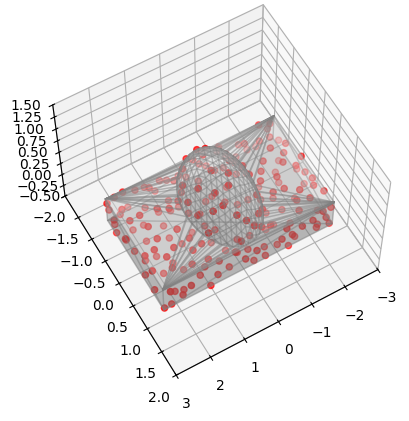

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

## 점들 표시
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red')
## mesh 표현
ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=model.faces, color='white', alpha= 0.3, edgecolor='gray')

## 보이는 각도 조정
ax.view_init(elev=60, azim=60)

## 축 크기 조정
plt.axis([-3, 3, -2, 2, -0.5,1.5])
plt.show()

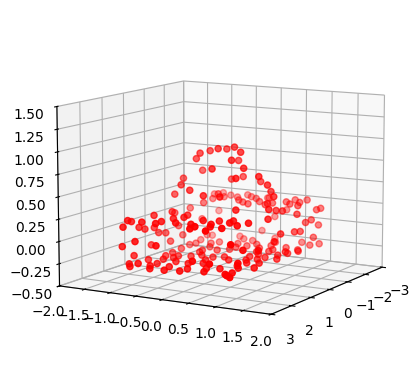

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=model.faces, color='white', alpha=0.5, edgecolor='gray', zorder=1)
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red', zorder=1)

ax.view_init(elev=10, azim=30)

plt.axis([-3, 3, -2, 2, -0.5,1.5])
plt.show()

## 확률 밀도 함수 추정
### scipy 내 parzen method는 1차원 윈도우만 생성
https://sebastianraschka.com/Articles/2014_kernel_density_est.html

## 데이터 CSV로 저장

In [16]:
import pandas as pd

In [17]:
df = pd.DataFrame(points)

In [18]:
df

,0,1,2
0,-0.965036,1.000000,0.005139
1,-0.674744,-0.544521,-0.250000
2,-1.561826,0.050777,-0.250000
3,0.869261,-0.065476,0.481430
4,2.500000,-0.664272,-0.192392
...,...,...,...
195,-1.585224,0.324759,-0.250000
196,0.630947,0.008919,0.771117
197,-0.244152,-1.000000,0.000362
198,0.121875,0.708578,0.691375


In [19]:
df.to_csv("../3D/data/points.csv", index=False)

## 데이터 호출

In [20]:
## 불러온 값은 함수값이 아님!! 밀도값임!
## 밀도값 -> 함수값으로 변환 필요
dens = pd.read_csv("../3D/data/density.csv")
# dens
# type(dens)

In [21]:
total = dens.sum().sum()

In [22]:
pdf = dens/total
# pdf
# type(pdf)
pdf.sum().sum()

0.9999999999999999

 H[X] = –∫S p(x) log p(x)dx = –E{log p(X)}
 
When we have a sufficient number of points sampled from p, we can approximate
the expectation by the sample mean [8], which gives  H[X] = -(1/N) sigma log p(x). 


![01](./obj/img01.png)
    
![02](./obj/img02.png)


In [23]:
enp = np.log2(pdf).sum().sum()
enp

-19433861.317082167

https://github.com/cran/misc3d/blob/master/R/kde3d.R

## 점들의 위치 재조정하기

### 표면 위의 점인지 확인

### 점 위치 조정 > 표면 위 점인지 확인하는 작업 필요할 듯


표면에서 tangent vector를 따라 이동하고,
gradient descent와 Euler method를 적용


In [24]:
len(points)

200

In [25]:
# from scipy.spatial import cKDTree
# 
# tree = cKDTree(points)
# d, index = tree.query(points[0], k=2)
# d[1], index[1]

In [66]:
from scipy.spatial import cKDTree

# 점 집합 복사본
copyPoints = points.copy()

# 0본 인덱스를 시작으로 가까운 점 정렬
sort_neighbor = []
sort_neighbor.append(points[0])

# 정렬한 리스트로 들어간 점들은 삭제
copyPoints = np.delete(copyPoints, 0, axis=0)

while copyPoints.size > 0:
    # kdree 사용
    tree = cKDTree(copyPoints)
    d, index = tree.query(sort_neighbor[-1], k=1)
    
    # 가까운 점 추가
    sort_neighbor.append(copyPoints[index])
    
    # 정렬한 리스트로 들어간 점들은 삭제
    copyPoints = np.delete(copyPoints, index, axis=0)

# 정렬된 점들을 numpy 배열로 변환
sorted_points = np.array(sort_neighbor)

# 차분을 통해 탄젠트 벡터 계산
tangent_vectors = np.diff(sorted_points, axis=0)

# # 단위 벡터로 표준화 (길이가 1인 벡터)
# tangent_vectors_normalized = tangent_vectors / np.linalg.norm(tangent_vectors, axis=1)[:, np.newaxis]

In [33]:
# sort_neighbor
tangent_vectors

array([[-1.30147004e-01,  0.00000000e+00,  1.92237195e-01],
       [-1.81357173e-01,  0.00000000e+00, -2.11363083e-01],
       [ 1.02816179e-01,  0.00000000e+00, -2.20612284e-01],
       [ 2.23130702e-01, -1.24800774e-01, -1.54007617e-02],
       [ 3.22296391e-01, -7.33631266e-02,  0.00000000e+00],
       [ 1.45122841e-01,  1.98163900e-01,  6.34018832e-02],
       [ 2.87925488e-01, -5.81502754e-02, -6.34018832e-02],
       [-2.91063197e-02, -2.38030492e-01,  0.00000000e+00],
       [ 9.42739389e-02, -2.58656498e-01,  0.00000000e+00],
       [ 1.91599113e-01,  2.18268668e-01,  0.00000000e+00],
       [ 2.28177444e-01, -1.31674306e-01,  0.00000000e+00],
       [ 2.96915182e-01,  1.23461061e-01,  0.00000000e+00],
       [-1.39943516e-01,  1.85004116e-01,  0.00000000e+00],
       [-3.37412546e-01,  1.59777726e-01,  2.25018050e-01],
       [-3.32778926e-01,  0.00000000e+00,  6.27525778e-02],
       [-3.00274748e-01, -1.95426658e-01,  2.31709464e-01],
       [ 1.70581868e-02, -9.34889954e-02

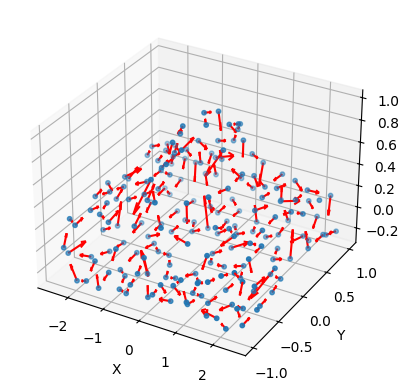

In [67]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 점 그리기
ax.scatter(sorted_points[:, 0], sorted_points[:, 1], sorted_points[:, 2], marker='o', s=10, label="Points")

# 각 점에서 탄젠트 벡터 그리기
# for i in range(len(tangent_vectors_normalized)):
#     ax.quiver(sorted_points[i, 0], sorted_points[i, 1], sorted_points[i, 2],
#               tangent_vectors_normalized[i, 0], tangent_vectors_normalized[i, 1], tangent_vectors_normalized[i, 2],
#               length=0.1, color='r')
    
# 각 점에서 탄젠트 벡터 그리기
for i in range(len(tangent_vectors)):
    ax.quiver(sorted_points[i, 0], sorted_points[i, 1], sorted_points[i, 2],
              tangent_vectors[i, 0], tangent_vectors[i, 1], tangent_vectors[i, 2],
              length=0.5, color='r')

# 제목 설정 및 축 라벨
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# ax.view_init(elev=30, azim=60)

# 플롯 보여주기
plt.show()

문제는 단순히 차분만 해서 벡터가 표면을 따라간다고 할 수는 없을거 같음

## 이동시키는 법
### 벡터에 스칼라값 곱해서
### 점 위치를 동일하게 유지하는 방법?